In [11]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.datasets import cifar10

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [13]:
print(x_train.shape) # image1장에 32 32 픽셀에 rgb 3개 세트가 있다.

(50000, 32, 32, 3)


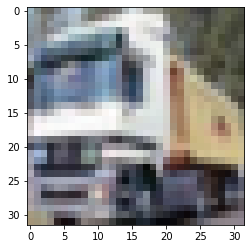

In [14]:
_, axe = plt.subplots()
axe.imshow(x_train[1])

In [34]:
m1 = keras.Sequential([
    keras.layers.Conv2D(32, kernel_size=(3,3), activation = 'relu', input_shape=(32, 32, 3),
                       padding = 'valid', data_format = 'channels_last'), # 2D는 평면
    # 32,32픽셀에서 3,3픽셀을 32개 를 준비하는 것이다.
    keras.layers.MaxPooling2D(pool_size = (2,2)),
    # 그 만들어 낸것을 stride를 안주었으니까 1개씩 움직이고,
    # flatten의 갯수를 죽이게 하는 것이 pooling이 하는 역할이다.
    keras.layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size = (2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

# function중에는 padding = 모서리까지 다 써줘

m1.compile(loss = keras.losses.SparseCategoricalCrossentropy(from_logits = True),
         optimizer = keras.optimizers.Adam(learning_rate = 0.001),
         metrics = ['accuracy'])

m1.summary()
# flatten의 갯수를 죽이게 하는 것이 pooling이 하는 역할이다.

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 13, 13, 32)        9248      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 6, 6, 32)         0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 1152)              0         
                                                                 
 dense_10 (Dense)            (None, 128)             

In [35]:
m1.fit(x_train, y_train, epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 22s 13ms/step - loss: 2.1796 - accuracy: 0.3176
Epoch 2/10
1563/1563 [==============================] - 21s 13ms/step - loss: 1.4683 - accuracy: 0.4721
Epoch 3/10
1563/1563 [==============================] - 23s 15ms/step - loss: 1.2701 - accuracy: 0.5523
Epoch 4/10
1563/1563 [==============================] - 25s 16ms/step - loss: 1.1276 - accuracy: 0.6063
Epoch 5/10
1563/1563 [==============================] - 22s 14ms/step - loss: 1.0163 - accuracy: 0.6495
Epoch 6/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.9256 - accuracy: 0.6785
Epoch 7/10
1563/1563 [==============================] - 23s 15ms/step - loss: 0.8514 - accuracy: 0.7032
Epoch 8/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.7863 - accuracy: 0.7284
Epoch 9/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.7293 - accuracy: 0.7479
Epoch 10/10
1563/1563 [==============================] - 20s 13m

In [37]:
X = np.arange(10, 35).reshape(1,5,5,1)
print(X)
m = keras.Sequential([
    keras.layers.Conv2D(1,3, activation = None, input_shape=(5,5,1))
])
m.predict(X)

[[[[10]
   [11]
   [12]
   [13]
   [14]]

  [[15]
   [16]
   [17]
   [18]
   [19]]

  [[20]
   [21]
   [22]
   [23]
   [24]]

  [[25]
   [26]
   [27]
   [28]
   [29]]

  [[30]
   [31]
   [32]
   [33]
   [34]]]]
1/1 [==============================] - 0s 65ms/step


array([[[[-8.35351  ],
         [-8.235739 ],
         [-8.117968 ]],

        [[-7.7646565],
         [-7.646883 ],
         [-7.5291123]],

        [[-7.1758013],
         [-7.0580306],
         [-6.940257 ]]]], dtype=float32)

In [42]:
X = np.arange(10, 35).reshape(1,1,5,5)
print(X)
m = keras.Sequential([
    keras.layers.Conv2D(1,3, activation = None, input_shape=(1,5,5), data_format = 'channels_first',
                       kernel_initializer = keras.initializers.Ones, # kernel은 픽셀에 곱해지는 값 a(픽셀) x X(kernel)
                       bias_initializer = keras.initializers.Zeros) # bias는 절편 ax + b 에서 b
])
print(m.predict(X))


#print(m.layers[0].weights)
# 계산하기 편하게 kernel은 Ones로
# bias는 Zeros로 바꿔둔다.

[[[[10 11 12 13 14]
   [15 16 17 18 19]
   [20 21 22 23 24]
   [25 26 27 28 29]
   [30 31 32 33 34]]]]
1/1 [==============================] - 0s 66ms/step
[[[[144. 153. 162.]
   [189. 198. 207.]
   [234. 243. 252.]]]]


In [40]:
a1 = np.arange(10, 35).reshape(5,5)
print(a1[:3,:3].sum())

144


In [49]:
# MaxPooling

X = np.arange(10, 35).reshape(1,5,5,1)
print(X.reshape(1,1,5,5))
m = keras.Sequential([
    keras.layers.MaxPooling2D(2, strides=1,input_shape=(5,5,1), data_format = 'channels_last',
                                 )])
pred = m.predict(X)
print(pred.shape)
print(pred.reshape(1,1,4,4))

[[[[10 11 12 13 14]
   [15 16 17 18 19]
   [20 21 22 23 24]
   [25 26 27 28 29]
   [30 31 32 33 34]]]]
1/1 [==============================] - 0s 62ms/step
(1, 4, 4, 1)
[[[[16. 17. 18. 19.]
   [21. 22. 23. 24.]
   [26. 27. 28. 29.]
   [31. 32. 33. 34.]]]]


In [48]:
# AveragePooling

X = np.arange(10, 35).reshape(1,5,5,1)
print(X.reshape(1,1,5,5))
m = keras.Sequential([
    #keras.layers.MaxPooling2D(2, strides=1,input_shape=(5,5,1), data_format = 'channels_last',
    keras.layers.AveragePooling2D(2, strides=1,input_shape=(5,5,1), data_format = 'channels_last', 
    #kernel_initializer = keras.initializers.Ones, # kernel은 픽셀에 곱해지는 값 a(픽셀) x X(kernel)
                       #bias_initializer = keras.initializers.Zeros) # bias는 절편 ax + b 에서 b
                             )])
pred = m.predict(X)
print(pred.shape)
print(pred.reshape(1,1,4,4))

[[[[10 11 12 13 14]
   [15 16 17 18 19]
   [20 21 22 23 24]
   [25 26 27 28 29]
   [30 31 32 33 34]]]]
1/1 [==============================] - 0s 58ms/step
(1, 4, 4, 1)
[[[[13. 14. 15. 16.]
   [18. 19. 20. 21.]
   [23. 24. 25. 26.]
   [28. 29. 30. 31.]]]]


In [52]:
vgg16 = keras.applications.VGG16(input_shape =(32, 32, 3), include_top = False)
vgg16.summary()

58889256/58889256 [==============================] - 6s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                              

In [55]:
m = keras.Sequential([
    vgg16,
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(10)
])

m.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_7 (Flatten)         (None, 512)               0         
                                                                 
 dense_12 (Dense)            (None, 128)               65664     
                                                                 
 dense_13 (Dense)            (None, 10)                1290      
                                                                 
Total params: 14,781,642
Trainable params: 14,781,642
Non-trainable params: 0
_________________________________________________________________


In [53]:
tf.config.list_physical_devices('GPU')

[]

In [56]:
tf.__version__

'2.12.0'